In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [99]:
bikes_Q1 = pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/bikes_q1_sample.csv')

In [100]:
bikes_Q1.shape

(174215, 12)

In [101]:
bikes_Q1.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,17617135,2018-01-22 20:04:31,2018-01-22 20:11:53,1131,442.0,471,Francisco Ave & Foster Ave,468,Budlong Woods Library,Subscriber,Female,1949.0
1,17897619,2018-03-16 19:47:59,2018-03-16 20:04:00,6146,961.0,296,Broadway & Belmont Ave,253,Winthrop Ave & Lawrence Ave,Subscriber,Male,1988.0
2,17881307,2018-03-14 18:49:20,2018-03-14 18:54:38,3847,318.0,260,Kedzie Ave & Milwaukee Ave,503,Drake Ave & Fullerton Ave,Subscriber,Male,1987.0
3,17881130,2018-03-14 18:33:48,2018-03-14 19:07:40,1483,"2,032.0",199,Wabash Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Male,1990.0
4,17686289,2018-02-05 17:39:14,2018-02-05 17:46:13,6391,419.0,596,Benson Ave & Church St,605,University Library (NU),Subscriber,Male,1992.0


In [102]:
bikes_Q1.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [103]:
#изменим формат дат в датафрейме
bikes_Q1[['start_time', 'end_time']] = bikes_Q1[['start_time', 'end_time']].apply(pd.to_datetime)

In [104]:
#возьмем за индексы start_time
bikes_Q1.set_index('start_time', inplace=True)

In [105]:
#высчитаем максимальное количество аренд за день
bikes_Q1.resample(rule='D').trip_id.count().max()

4196

In [106]:
#загрузим новые данные
bikes_april = pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/bikes_april.csv')

In [107]:
bikes_april.shape

(90144, 12)

In [108]:
bikes_april.head()

,start_time,trip_id,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,2018-04-01 00:10:23,18000531,2018-04-01 00:22:12,5065,709.0,228,Damen Ave & Melrose Ave,219,Damen Ave & Cortland St,Subscriber,Male,1983.0
1,2018-04-01 00:15:49,18000533,2018-04-01 00:19:47,4570,238.0,128,Damen Ave & Chicago Ave,130,Damen Ave & Division St,Subscriber,Male,1978.0
2,2018-04-01 00:17:00,18000534,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
3,2018-04-01 00:20:00,18000536,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
4,2018-04-01 00:23:19,18000538,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0


In [109]:
bikes_april.dtypes

start_time            object
trip_id                int64
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [110]:
#поменяем формат дат в нужных нам ячейках
bikes_april[['start_time', 'end_time']] = bikes_april[['start_time', 'end_time']].apply(pd.to_datetime)

In [111]:
#установим start_time в качестве индекса
bikes_april.set_index('start_time', inplace=True)

In [112]:
#найдем количество аренд за 18 апреля среди пользователей Subscriber
bikes_april.groupby('usertype').resample(rule='D').size().T.loc['2018-04-18', 'Subscriber']

2196

In [135]:
#загрузим новые данные за каждый месяц и объединим их в один датафрейм
bikes = pd.concat([pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q2_sample_apr.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q2_sample_may.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q2_sample_jun.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q3_sample_july.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q3_sample_aug.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q3_sample_sep.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q4_sample_oct.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q4_sample_nov.csv'),
                   pd.read_csv('C:/Users/bkunt/jupyter/karpov/data/8_bikes_data/bikes_q4_sample_dec.csv')])

In [136]:
bikes.shape

(964781, 12)

In [122]:
bikes.head()

,trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
0,18000534,2018-04-01 00:17:00,2018-04-01 00:22:53,1323,353.0,130,Damen Ave & Division St,69,Damen Ave & Pierce Ave,Subscriber,Male,1991.0
1,18000536,2018-04-01 00:20:00,2018-04-01 00:26:22,2602,382.0,121,Blackstone Ave & Hyde Park Blvd,351,Cottage Grove Ave & 51st St,Subscriber,Female,1992.0
2,18000538,2018-04-01 00:23:19,2018-04-01 00:35:01,4213,702.0,31,Franklin St & Chicago Ave,180,Ritchie Ct & Banks St,Subscriber,Male,1985.0
3,18000540,2018-04-01 00:24:46,2018-04-01 00:44:23,6401,"1,177.0",596,Benson Ave & Church St,517,Clark St & Jarvis Ave,Subscriber,Male,1974.0
4,18000541,2018-04-01 00:26:04,2018-04-01 00:31:05,6333,301.0,145,Mies van der Rohe Way & Chestnut St,24,Fairbanks Ct & Grand Ave,Subscriber,Male,1984.0


In [123]:
bikes.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration          object
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [138]:
bikes[['start_time', 'end_time']] = bikes[['start_time', 'end_time']].apply(pd.to_datetime)

In [139]:
bikes.set_index('start_time', inplace=True)

In [140]:
#найдем дни, в которые число аренд, сделанных customers, было больше, чем у subscribers
bikes.groupby('usertype').resample(rule='D').size().T.query('Subscriber < Customer')

usertype,Customer,Subscriber
start_time,,
2018-05-27,3263,2449
2018-09-02,2752,2183


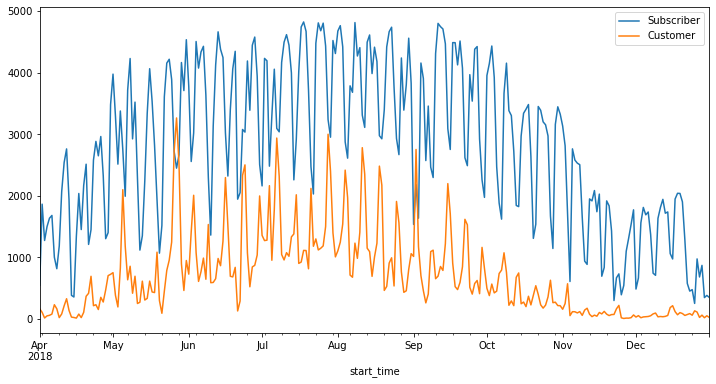

In [150]:
#построим графики количества аренд по типу пользователя
plt.figure(figsize=(12, 6))
bikes.query('usertype == "Subscriber"').resample(rule='D').size().plot(label='Subscriber')
bikes.query('usertype == "Customer"').resample(rule='D').size().plot(label='Customer')
plt.legend()
plt.show()

In [233]:
#нам нужны наблюдения с 1 июня по 31 августа
bikes_summer = bikes.loc['2018-06-01': '2018-08-31' , :]

In [176]:
#определим наиболее популярный пункт назначения
top_destination = bikes_summer.to_station_name.value_counts().index[0]

In [195]:
#определим, в какой день в полученный пункт было совершено меньше всего поездок
bad_day = bikes_summer.query('to_station_name == @top_destination') \
                      .resample(rule='D') \
                      .size() \
                      .sort_values(ascending=True) \
                      .index[0] \
                      .strftime('%Y-%m-%d')

In [234]:
#нам нужно узнать популярные пункты назначения по выходным и в будние дни
bikes_summer.reset_index(inplace=True)
bikes_summer['weekday'] = bikes_summer.start_time.dt.day_name()
weekend = ['Saturday', 'Sunday']

C:\Users\bkunt\AppData\Local\Temp\ipykernel_27476\1494551831.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bikes_summer['weekday'] = bikes_summer.start_time.dt.day_name()


In [245]:
#в выходные
bikes_summer.query('weekday in @weekend').to_station_name.value_counts().head()

Streeter Dr & Grand Ave       6026
Lake Shore Dr & North Blvd    3092
Theater on the Lake           2858
Lake Shore Dr & Monroe St     2271
Millennium Park               1984
Name: to_station_name, dtype: int64

In [244]:
#в будни
bikes_summer.query('weekday not in @weekend').to_station_name.value_counts().head()

Streeter Dr & Grand Ave         7614
Canal St & Adams St             6142
Clinton St & Washington Blvd    4857
Clinton St & Madison St         4694
Lake Shore Dr & North Blvd      4213
Name: to_station_name, dtype: int64